# Chapter18. 하이퍼파라미터와 튜닝(2)

## 18.1. 결정 트리의 하이퍼파라미터
### 18.1.1. 파라미터 max_depth
   - max_depth : 모델을 학습시키는 트리의 최대 깊이를 나타내는 파라미터.
   - max_depth값이 설정되어 있지 않으면, 지도 데이터를 모두 분할해버리므로, 필요이상의 특징까지 학습
   - max_depth를 설정하여 트리의 높이를 제한하는 것을 " 결정 트리의 가지치기 **_pruning_** " 이라고 한다.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


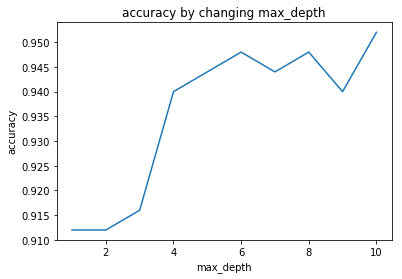

In [42]:
# 모듈을 import
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Generation
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Set the range of 'max_dapth' (1~10)
depth_list = [i for i in range(1, 11)]
print(depth_list)

# make empty list for accuracy set
accuracy = []

# training models by changing 'max_depth'
for max_depth in depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

# plot. graph
plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()


### 18.1.2. 파라미터 random_state
   - random_state는 학습 결과의 유지 뿐만 아니라, 결정 트리의 학습 과정에 직접 관여하는 파라미터 (학습결과를 유지)
   - 결정트리의 분할 시점에(결정 트리를 분할하는 값을 결정) 데이터의 분류를 잘 설명할 수 있는 요소값을 찾아 데이터를 분할
   - 후보값을 random_state로 난수를 생성하여 결정함 (학습에 사용할 난수값 생성을 위해 사용하는 파라미터)
   

## 18.2. 랜덤 포레스트의 하이퍼파라미터
### 18.2.1. 파라미터 n_estimators
   - n_estimators : 랜덤 포레스트의 간이 결정 트리수를 결정하는 파라미터

n_estimators_list : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


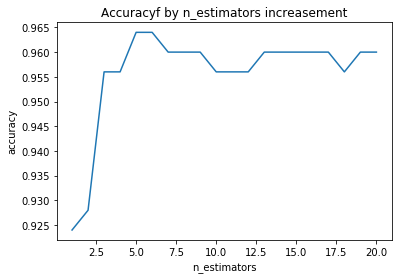

In [43]:
# 18-3 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Generate
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Set the value of 'n_estimators' (1~20)
n_estimators_list = [i for i in range(1, 21)]
print("n_estimators_list :", n_estimators_list)

# Make the empty list fot setting accuracy value
accuracy = []

# Code Generate :
# Model Training by changing n_estimators
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=42
    )
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    

# plot graph
plt.plot(n_estimators_list, accuracy)
plt.title("Accuracyf by n_estimators increasement")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()






### 18.2.2. 파라미터 max_depth
   - 랜덤 포레스트는 간이결정트리를 여러 개 만드므로, 결정트리에 대한 파라미터를 설정할 수 있음
   - 결정트리에서 보았듯이 max_depth는 결정 트리 지도 데이터의 과학습을 막기 위한 파라미터
   - max_depth는 결정 트리의 파라미터이지만, 랜덤 포레스트에서는 일반적인 결정 트리보다 작은 값을 입력하여 사용가능
   - 랜덤 포레스트는 간이 결정트리 분류의 다수결 알고리즘이기 때문에, 각각의 결정 트리에 엄겨한 분류를 하지 않고
   - 주목하는 요소를 집중적으로 분석하여 학습 효율과 정밀도를 높게 유지

### 18.2.3. 파라미터 random_state
   - random_state는 랜덤 포레스트에서 중요한 파라미터이다.
   - 랜덤 포레스트는 결과의 고정 뿐만 아니라, 결정 트리의 데이터 분할이나 이용 요소의 결정 등 많은 곳에서 난수가 기여하므로,
   - random_state 파라미터에 의해 분석 결과가 크게 달라진다.

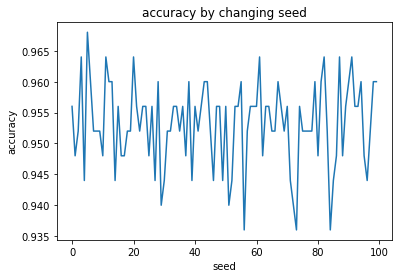

In [44]:
# 18-5
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

# Data Generation
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Set the range of 'r_seeds' value (0~99)
r_seeds = [i for i in range(100)]

# Make empty list for save accuracy value
accuracy = []

# Code Generate
# Model Training by chaning 'random_state'value
for seed in r_seeds:
    model = RandomForestClassifier(random_state=seed)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))



# plot the graph
plt.plot(r_seeds, accuracy)
plt.xlabel("seed")
plt.ylabel("accuracy")
plt.title("accuracy by changing seed")
plt.show()


## 18.3 k-NN의 하이퍼파라미터
### 18.3.1. 파라미터 n_neighbors
   - n_neighbors는 k-NN의 k값을 의미. 즉 결과 예측시에 사용되는 유사 데이터의 개수를 결정하는 파라미터
   - n_neighbors의 수가 너무 많으면, 유사 데이터로 선정되는 데이터의 유사도가 커지기 때문에 분류 범위가 좁은 카테고리가 잘 분류되지 않음

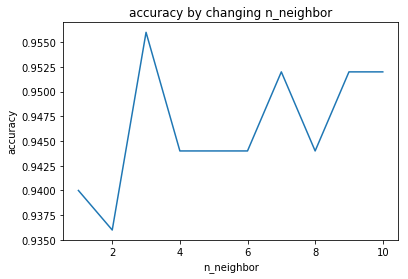

In [45]:
# 18-7
# k-NN의 n_neighbors의 차이에 의한 분류의 정확도를 그래프로 나타냅시다
# n_neighbors에 k_list의 값을 순차적으로 대입하여 테스트 데이터의 정확도를 산출하고, n_neighbors와의 관계를 나타낸 그래프출력
# -------
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

# Generate Data
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    random_state=42
)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# Set the range of 'n_neighbors'
k_list = [i for i in range(1,11)]

# Make empty list for saving accuracy data
accuracy = []

# Make your code
# Make Model Training by changing 'n_neighbors' parameter
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    
# Plot the Graph
plt.plot(k_list, accuracy)
plt.xlabel("n_neighbor")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_neighbor")
plt.show()

## 18.4 튜닝 자동화 (파라미터 자동 검색)
   - 머신러닝에서 자주사용되는 파라미터가 여러 개 있으나, 모든 파라미터를 그 때마다 바꿔가며 결과를 확인하는 것은 힘듬
   - 파라미터의 범위를 지정하여 가장 결과가 좋은 파라미터 셋을 컴퓨터가 찾게 하는 방법이 있으며, 
   - 주요한 방법으로, 
          (1) 그리드 검색
          (2) 랜덤 검색
     두 가지가 있다.

### 18.4.1. 그리드 검색
   - 그리드 검색grid search 은
      (1) 조정하려는 하이퍼파라미터값의 후보를 명시적으로 복수 지정하여 파라미터셋을 만들고,
      (2) 모델의 평가를 반복하여, 최적의 파라미터셋을 만드는 데 사용하는 방법이다.
   - 값의 후보를 명시적으로 지정하므로, 파라미터값에 문자열이나 정수, True, False같은 수학적으로 연속적이지 않은 값을 취하는 파라미터의 탐색에 적합하다.
   - 단점 : 파라미터 후보를 모두 포함하도록 파라미터 셋이 작성되므로, 여러 파라미터를 동시에 튜닝하기는 적합하지 않다.
   - 프로그램 실행에 시간이 많이 걸리므로 주의

In [ ]:
# 18-9 그리드 검색의 예
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# Set the candidates of that parameters
model_param_set_grid = {
    SVC():{
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C":[10**i for i in range(-5, 5)],
        "decision_function_shape": ["ovr", "ovo"],
        "random_state": [42]
    }
}
max_score = 0
best_param = None

# Grid Search 
for model, param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
        
print("파라미터 : {}".format(best_param))
print("최고점수 : ", max_score)
svm = SVC()
svm.fit(train_X, train_y)
print()
print("조정 없음")
print(svm.score(test_X, test_y))

### 18.4.2. 랜덤 검색
   - 그리드 검색 : 값의 후보를 지정한 뒤 파라미터를 조정
   - 랜덤 검색 : 파라미터가 취할 수 있는 값의 범위를 지정하고, (파라미터의 확률함수-scipy.stats모듈 주로사용-를 지정하는 것)
                확률로 결정된 파라미터 셋을 사용하여 모델평가를 반복함으로써, 최적의 파라미터 셋을 찾는 방법

In [ ]:
# 18-10 랜덤 검색의 예
import scipy.stats
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# Set the candidates for parameters
model_param_set_random = {
    SVC(): {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C" : scipy.stats.uniform(0.00001, 1000),
        "decision_function_shape": ["ovr", "ovo"],
        "random_state" : scipy.stats.randint(0,100)
    }
}
max_score = 0
best_param = None

# Search parameter for randomized search
for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    if max_score < score:
        max_score = score
        best_param = clf.best_params_
        
print("파라미터: {}".format(best_param))
print("최고 점수: ",max_score)
svm = SVC()
svm.fit(train_X, train_y)
print()
print("조정 없음")
print(svm.score(test_X, test_y))

# 연습문제

In [25]:
# 18-11
import requests
import io
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# Preprocessing Data
vote_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
s = requests.get(vote_data_url).content
vote_data = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
vote_data.columns = [
    'Class Name',
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups-in-schools',
    'anti-satelllite-test-ban',
    'aid-to-niaraguan-contras',
    'mx-missile',
    'immigration',
    'synfuels-corporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa'
]
label_encode = preprocessing.LabelEncoder()
vote_data_encode = vote_data.apply(
    lambda x: label_encode.fit_transform(x)
)
X = vote_data_encode.drop('Class Name', axis=1)
Y = vote_data_encode['Class Name']
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=50)


# Make Code : using for syntax.
models_name = ["SVM", "결정트리", "랜덤포레스트"]
models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
params = [
    {
        "C": [0.01, 0.1, 1.0, 10, 100],
        "kernel" : ["linear","rbf","poly","sigmoid"],
        "random_state":[42]
    },
    {
        "max_depth":[i for i in range(1,10)],
        "random_state":[i for i in range(100)]
    },
    {
        "n_estimators" : [i for i in range(10, 20)],
        "max_depth":[i for i in range(1, 10)],
        "random_state": [i for i in range(100)]
    }
]

for name, model, param in zip(models_name, models, params):
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    print(name)
    print(clf.score(test_X, test_y))
    print()

SVM
0.9541284403669725

결정트리
0.944954128440367

랜덤포레스트
0.963302752293578



# 종합문제

### 하이퍼파라미터 및 튜닝 기술의 특성과 중요성, 하이퍼파라미터의 검색방법 이해 점검

### 문제 :
   - 데이터셋 : 필기체 숫자 이미지, 판별을 위한 파라미터나 모델 선택이 중요함
   - 필기체 숫자를 인식하고 분류하는 학습기를 높은 정밀도록 작성하고 싶습니다. 모델을 선택하고, 하이퍼 파라미터를 조정하여 높은 학습 능력을 가진 학습기를 만드세요.
   - 가장 높은 평가를 받은 학습 모델 기법의 이름과 조정된 파라미터명, 값을 출력하세요
   - 문제의 조건을 충족하고 있는 상태에서 다음 사항을 고려하여 종합적으로 평가하세요
        (1) 높은 평가치
        (2) 파라미터 조정 방법
        (3) 프로그램 실행 시간

In [41]:
# 18-13 문제 

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# -------------------------------------------------------
# 필요한 모듈이 있으면 추가하세요.
# -------------------------------------------------------
import scipy.stats     # 수치해석용 python package .확률분포 분석용 Sub package
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
# -------------------------------------------------------

data = load_digits()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, random_state=42)

# -------------------------------------------------------
# 아래에 코드를 작성하세요
# -------------------------------------------------------
# 그리드 검색을 위해 모델과 파라미터셋을 정리한 딕셔너리를 준비합니다.
# 딕셔너리의 key에는 객체의 인스턴스를 지정할 수 있습니다.

model_param_set_grid = {
    LogisticRegression(): {
        "C": [10 ** i for i in range(-5, 5)],
        "random_state": [42]
    },
    LinearSVC(): {
        "C": [10 ** i for i in range(-5, 5)],
        "multi_class": ["ovr", "crammer_singer"],
        "random_state": [42]
    },
    SVC(): {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [10 ** i for i in range(-5, 5)],
        "decision_function_shape": ["ovr", "ovo"],
        "random_state": [42]
    },
    DecisionTreeClassifier(): {
        "max_depth": [i for i in range(1, 20)],
    },
    RandomForestClassifier(): {
        "n_estimators": [i for i in range(10, 20)],
        "max_depth": [i for i in range(1, 10)],
    },
    KNeighborsClassifier(): {
        "n_neighbors": [i for i in range(1, 10)]
    }
}

# 랜덤 검색을 위해 모델과 파라미터셋을 정리한 딕셔너리를 준비합니다.
model_param_set_random = {
    LogisticRegression(): {
        "C" : scipy.stats.uniform(0.00001, 1000),
        "random_state": scipy.stats.randint(0, 100)
    },
    LinearSVC(): {
        "C" : scipy.stats.uniform(0.00001, 1000),
        "multi_class": ["ovr", "crammer_singer"],
        "random_state": scipy.stats.randint(0, 100)        
    },
    SVC(): {
        "kernel" : ["linear", "poly", "rbf", "sigmoid"],
        "C" : scipy.stats.uniform(0.00001, 1000),
        "decision_function_shape" : ["ovr", "ovo"],
        "random_state" : scipy.stats.randint(0, 100)
    },
    DecisionTreeClassifier(): {
        "max_depth" : scipy.stats.randint(1, 20),
    },
    RandomForestClassifier(): {
        "n_estimators" : scipy.stats.randint(10, 100),
        "max_depth" : scipy.stats.randint(1, 20),
    },
    KNeighborsClassifier(): {
        "n_neighbors" : scipy.stats.randint(1, 20)
    }
}

# 점수 비교용 변수를 준비합니다.
max_score = 0
best_model = None
best_param = None


# 그리드 검색으로 파라미터 검색을 수행합니다.
for model, param in model_param_set_grid.items():
    clf = GridSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")

    
    # 최고 평가 갱신시, 모델과 파라미터를 업데이트합니다.
    if max_score < score :
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
        
# 랜덤 검색으로 파라미터 검색을 수행합니다.
for model, param in model_param_set_random.items():
    clf = RandomizedSearchCV(model, param)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y, pred_y, average="micro")
    
    #최고 평가 갱신 시, 모델과 파라미터를 업데이트합니다.
    if max_score < score:
        max_score = score
        best_model = model.__class__.__name__
        best_param = clf.best_params_
        
# -------------------------------------------------------


print("학습 모델 : {}, \n파라미터: {}".format(best_model, best_param))
# 가장 성적이 좋은 점수를 출력하세요
print("최고 점수: ", max_score)

학습 모델 : SVC, 
파라미터: {'C': 0.0001, 'decision_function_shape': 'ovr', 'kernel': 'poly', 'random_state': 42}
최고 점수:  0.9888888888888889
